In [50]:
# Force no warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

# Setup and imports
import PIL
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

(-0.5, 460.5, 460.5, -0.5)

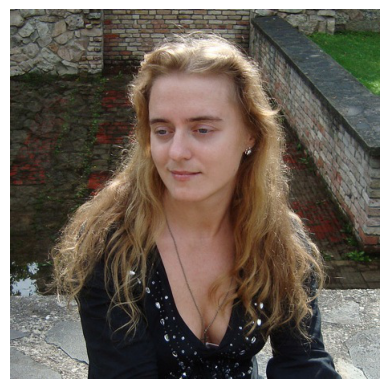

In [51]:
img =np.array(PIL.Image.open('me3.jpg'))
plt.imshow(img)
plt.axis('off')

In [52]:
def image_cluster(img, k):
    
    """
    Clusters an image using K-Means clustering algorithm.

    Args:
      img: A NumPy array representing the image (height, width, channels).
      k: The number of clusters to use (number of desired output colors).

    Returns:
      A tuple containing:
          - The clustered image (same shape as the input image).
          - The inertia (sum of squared distances of points to their cluster centers) of the clustering.
    """

    # Reshape the image into a 2D array, where each row represents a pixel's RGB values
    img_flat = img.reshape(img.shape[0] * img.shape[1], 3)

    # Perform K-Means clustering with the specified number of clusters and a fixed random state
    kmeans = KMeans(n_clusters=k, random_state=42).fit(img_flat)

    # Create a copy of the flattened image data
    img_flat2 = img_flat.copy()

    # Loop through each unique cluster label
    for i in np.unique(kmeans.labels_):
        # Select pixels belonging to the current cluster (based on labels)
        img_flat2[kmeans.labels_ == i, :] = kmeans.cluster_centers_[i]  # Broadcasting to update all rows

    # Reshape the clustered data back to the original image shape
    img2 = img_flat2.reshape(img.shape)

    # Return the clustered image and the inertia (clustering quality measure)
    return img2, kmeans.inertia_

In [53]:
# Define a list of k values for clustering (number of desired output colors)
k_vals = list(range(2,43,4))

# Create empty lists to store clustered images and inertia values
img_list = []
inertia = []

# Loop through each value of k in k_vals
for k in k_vals:
    
    img2, ine = image_cluster(img, k) # Perform image clustering using the image and current k value
    img_list.append(img2)
    inertia.append(ine)

In [54]:
#Appending original image 
img_list.append(img)

Text(0, 0.5, 'Inertia')

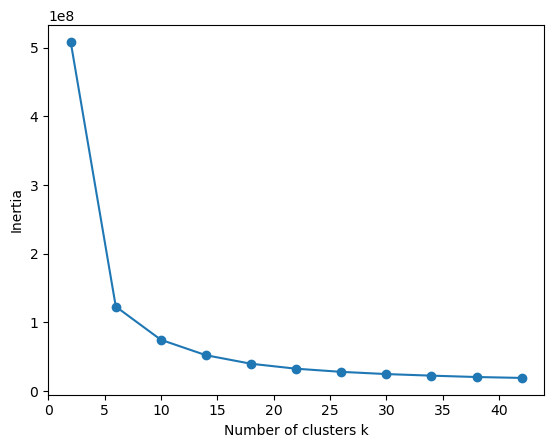

In [55]:
# Plot to find optimal number of clusters
plt.plot(k_vals,inertia)
plt.scatter(k_vals,inertia)
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')

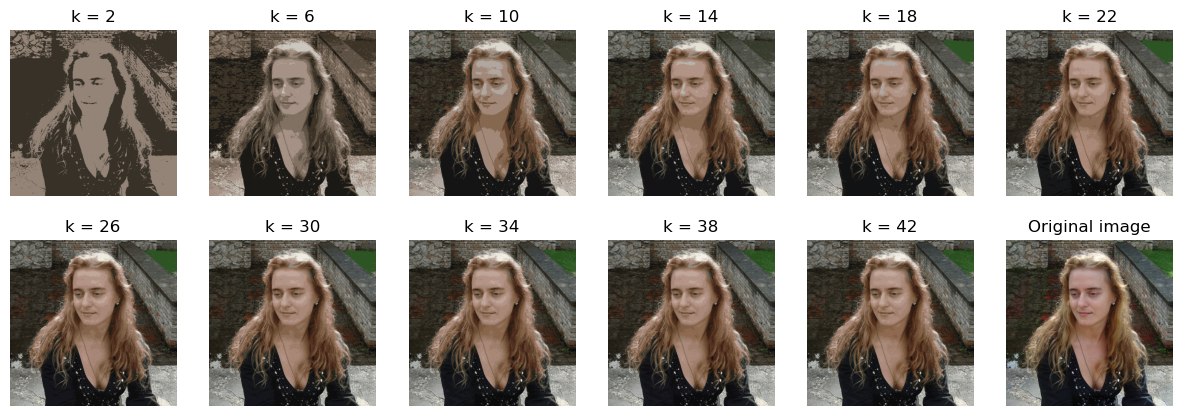

In [56]:
plt.figure(figsize=[15,5])

for i in range(len(k_vals)+1):
    plt.subplot(2,6,i+1)
    plt.imshow(img_list[i])
    if i<len(k_vals):
        plt.title('k = '+ str(k_vals[i]))
    else:
        plt.title("Original image")
    plt.axis('off')


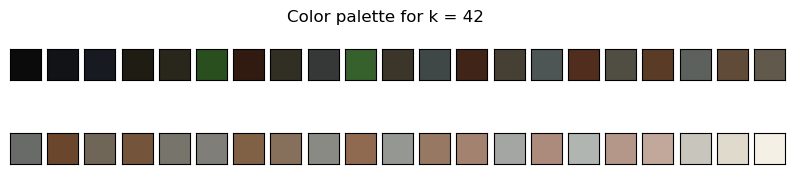

In [57]:
def colors_palette(image):
    
    """
    Displays a color palette from the unique colors in a given image.

    Args:
        image: A NumPy array representing the image (height, width, channels).
    """
   
    flat_image = image.reshape(-1, 3)
    
    # Find the unique colors in the image data
    unique_colors=np.unique(flat_image, axis=0)
    num_colors = len(unique_colors)
    rows, cols = 2, int(num_colors/2)
    width, height = 10, 10
    fig, axes = plt.subplots(rows, cols, figsize=(10, 2))
    plt.suptitle(f'Color palette for k = {num_colors}')
    
    axes = axes.ravel()
    
    # Loop through each unique color
    for i in range(num_colors):
        # Extract RGB values for the current color      
        R, G, B = unique_colors[i] 
        # Create a color image with the extracted RGB values
        color = np.array([R, G, B]).astype('uint8') 
        image = np.full((height, width, 3), color, dtype=np.uint8)
        axes[i].imshow(image)
  
        # Remove axes labels and ticks
        axes[i].set_xticks([])
        axes[i].set_yticks([])
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].set_axisbelow(False)  # Hide axes behind the image

    plt.show()

# Display color palette for the 11th image (index 10)
colors_palette(img_list[10])